In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [161]:
df = pd.read_csv('DataSet3_2.csv', sep = ';')
df['Dollar'] = df['Dollar'].str.replace(',', '.').astype(float)
df['Oil Brent'] = df['Oil Brent'].str.replace(',', '.').astype(float)
df['Dollar'] = df['Dollar'].astype(int)
df['Oil Brent'] = df['Oil Brent'].astype(int)

df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
start_date = pd.to_datetime('01.01.2020', format='%d.%m.%Y')
df['Data'] = (df['Data'] - start_date).dt.days
df.head()

,Data,Dollar,Oil Brent
0,0,61,66
1,8,61,65
2,9,61,65
3,10,61,64
4,13,60,64


In [162]:
# Подготовка данных с учетом лагов
lags = 1  # количество лагов
df['Oil Brent Lag'] = df['Oil Brent'].shift(lags)
data = df.dropna()
df.head()

,Data,Dollar,Oil Brent,Oil Brent Lag
0,0,61,66,NaN
1,8,61,65,66.0
2,9,61,65,65.0
3,10,61,64,65.0
4,13,60,64,64.0


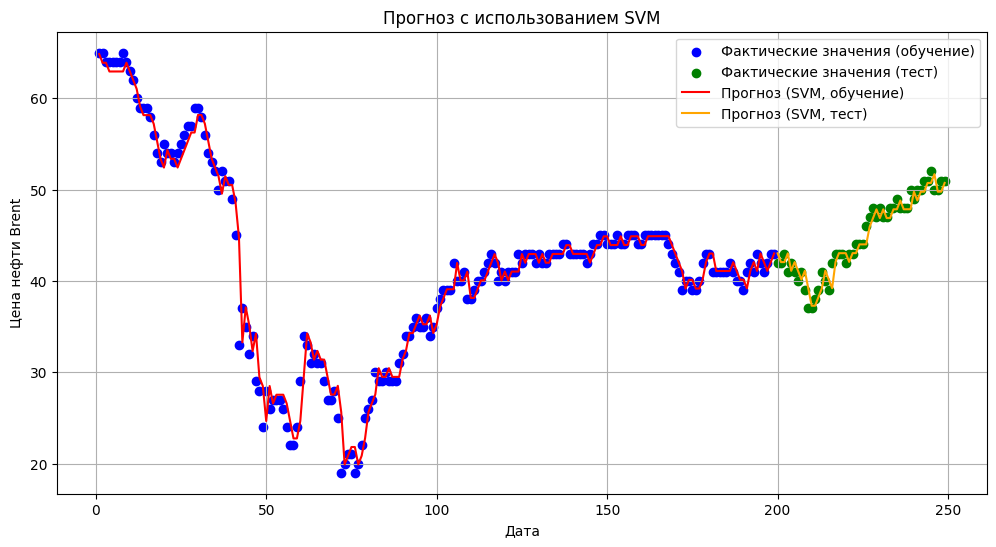

RMSE (SVM, обучение): 1.7078924898178445
RMSE (SVM, тест): 1.134009869546569


In [163]:
# Разделение данных на обучающий и тестовый наборы
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data[['Data', 'Oil Brent Lag']]
y_train = train_data['Oil Brent']
X_test = test_data[['Data', 'Oil Brent Lag']]
y_test = test_data['Oil Brent']

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели SVM
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Прогноз на обучающаюх и тестовом наборах
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Вычисление RMSE
rmse_train_svm = np.sqrt(mean_squared_error(y_train, y_train_pred_svm))
rmse_test_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_svm, label='Прогноз (SVM, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_svm, label='Прогноз (SVM, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием SVM')
plt.legend()
plt.grid(True)
plt.show()

# Вывод RMSE
print(f'RMSE (SVM, обучение): {rmse_train_svm}')
print(f'RMSE (SVM, тест): {rmse_test_svm}')


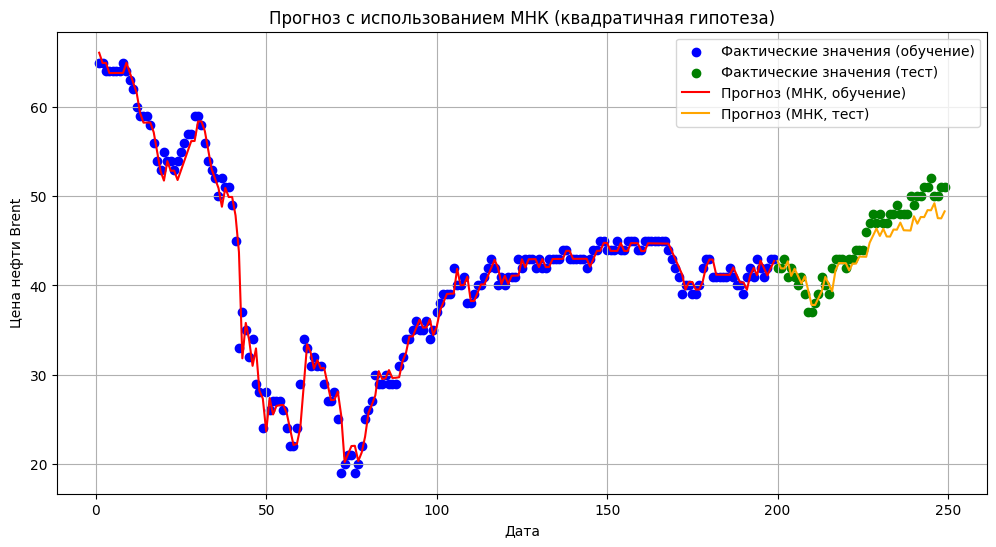

RMSE (МНК, обучение): 1.6406987225249037
RMSE (МНК, тест): 1.8873402765305847


In [164]:
# Обучение модели МНК с квадратичной гипотезой
poly_features = PolynomialFeatures(degree=2)  # Используем полином 2-й степени
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# Прогноз на обучающих и тестовых наборах
y_train_pred_mnk = lm.predict(X_train_poly)
y_test_pred_mnk = lm.predict(X_test_poly)

# Вычисление RMSE для МНК
rmse_train_mnk = np.sqrt(mean_squared_error(y_train, y_train_pred_mnk))
rmse_test_mnk = np.sqrt(mean_squared_error(y_test, y_test_pred_mnk))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_mnk, label='Прогноз (МНК, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_mnk, label='Прогноз (МНК, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием МНК (квадратичная гипотеза)')
plt.legend()
plt.grid(True)
plt.show()

# Вывод RMSE
print(f'RMSE (МНК, обучение): {rmse_train_mnk}')
print(f'RMSE (МНК, тест): {rmse_test_mnk}')



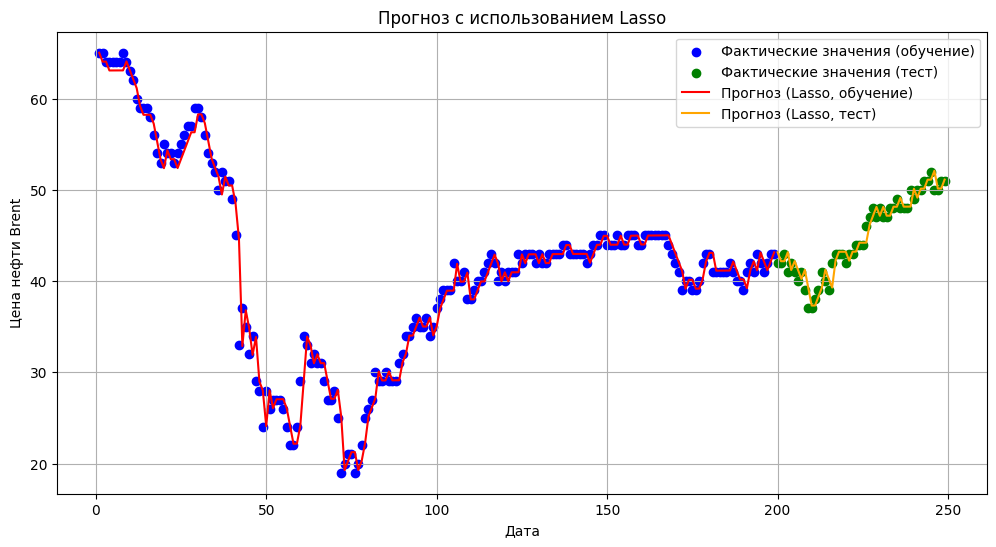

RMSE (Lasso, обучение): 1.6905715657838631
RMSE (Lasso, тест): 1.1102035831631314


In [165]:
# Разделение данных на обучающий и тестовый наборы (данные уже подготовлены с лагами)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data[['Data', 'Oil Brent Lag']]
y_train = train_data['Oil Brent']
X_test = test_data[['Data', 'Oil Brent Lag']]
y_test = test_data['Oil Brent']

# Обучение модели Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Прогноз на обучающем и тестовом наборах
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Вычисление RMSE
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_lasso, label='Прогноз (Lasso, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_lasso, label='Прогноз (Lasso, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием Lasso')
plt.legend()
plt.grid(True)
plt.show()

print(f'RMSE (Lasso, обучение): {rmse_train_lasso}')
print(f'RMSE (Lasso, тест): {rmse_test_lasso}')


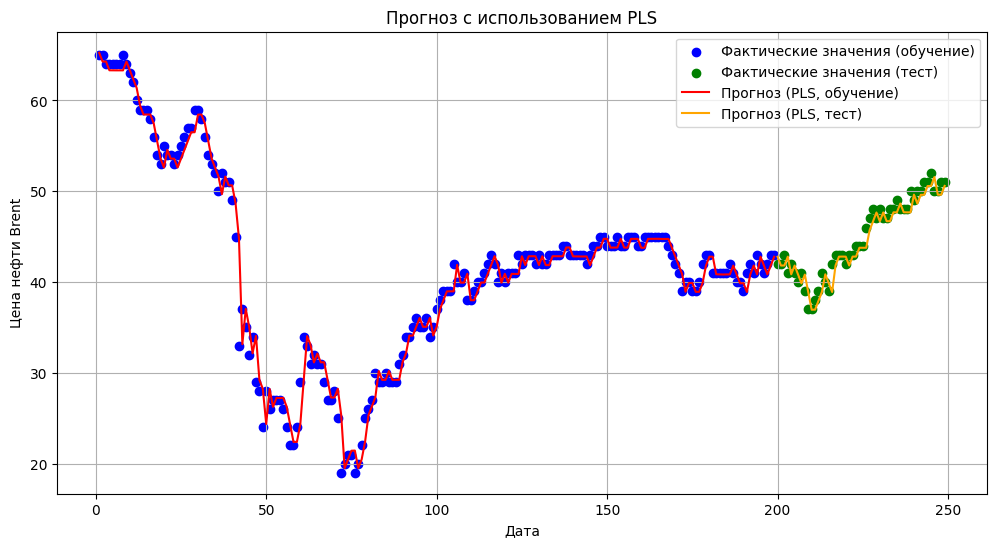

RMSE (PLS, обучение): 1.6993808798203291
RMSE (PLS, тест): 1.1875541484995562


In [166]:
# Разделение данных на обучающий и тестовый наборы (данные уже подготовлены с лагами)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data[['Dollar', 'Oil Brent Lag']]
y_train = train_data['Oil Brent']
X_test = test_data[['Dollar', 'Oil Brent Lag']]
y_test = test_data['Oil Brent']

# Обучение модели PLS
pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)

# Прогноз на обучающем и тестовом наборах
y_train_pred_pls = pls_model.predict(X_train)
y_test_pred_pls = pls_model.predict(X_test)

# Вычисление RMSE
rmse_train_pls = np.sqrt(mean_squared_error(y_train, y_train_pred_pls))
rmse_test_pls = np.sqrt(mean_squared_error(y_test, y_test_pred_pls))

# Построение графиков
plt.figure(figsize=(12, 6))
plt.scatter(train_data.index, y_train, label='Фактические значения (обучение)', color='blue')
plt.scatter(test_data.index, y_test, label='Фактические значения (тест)', color='green')
plt.plot(train_data.index, y_train_pred_pls, label='Прогноз (PLS, обучение)', color='red')
plt.plot(test_data.index, y_test_pred_pls, label='Прогноз (PLS, тест)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз с использованием PLS')
plt.legend()
plt.grid(True)
plt.show()

# Вывод RMSE
print(f'RMSE (PLS, обучение): {rmse_train_pls}')
print(f'RMSE (PLS, тест): {rmse_test_pls}')

